# Principal Component Analysis with Cancer Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [15]:
# Load the dataset

cancer_data = pd.read_csv("/content/drive/My Drive/Great_Lakes_Assignments/Lab Internal | Residency 5/breast-cancer-wisconsin-data.csv")
cancer_data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [16]:
cancer_data.shape

(699, 11)

In [10]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [49]:
cancer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [0]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [0]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [20]:
cancer_data.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [29]:
cancer_data['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [37]:
max_frequent_value = cancer_data['Bare Nuclei'].mode()[0]
print(max_frequent_value)

1


In [0]:
cancer_data['Bare Nuclei'].replace('?',max_frequent_value,inplace=True)

In [41]:
cancer_data['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [0]:
cancer_data['Bare Nuclei'] = cancer_data['Bare Nuclei'].astype('int')

In [47]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


In [57]:
cancer_data = cancer_data.drop_duplicates()
cancer_data.shape

(690, 11)

In [58]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 11 columns):
ID                             690 non-null int64
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null int64
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: int64(11)
memory usage: 64.7 KB


In [0]:
#Now we can drop the ID column
cancer_data = cancer_data.drop(['ID'], axis=1)

In [60]:
cancer_data.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [0]:
# Check for correlation of variable

In [64]:
cancer_data.corr().T

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [0]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


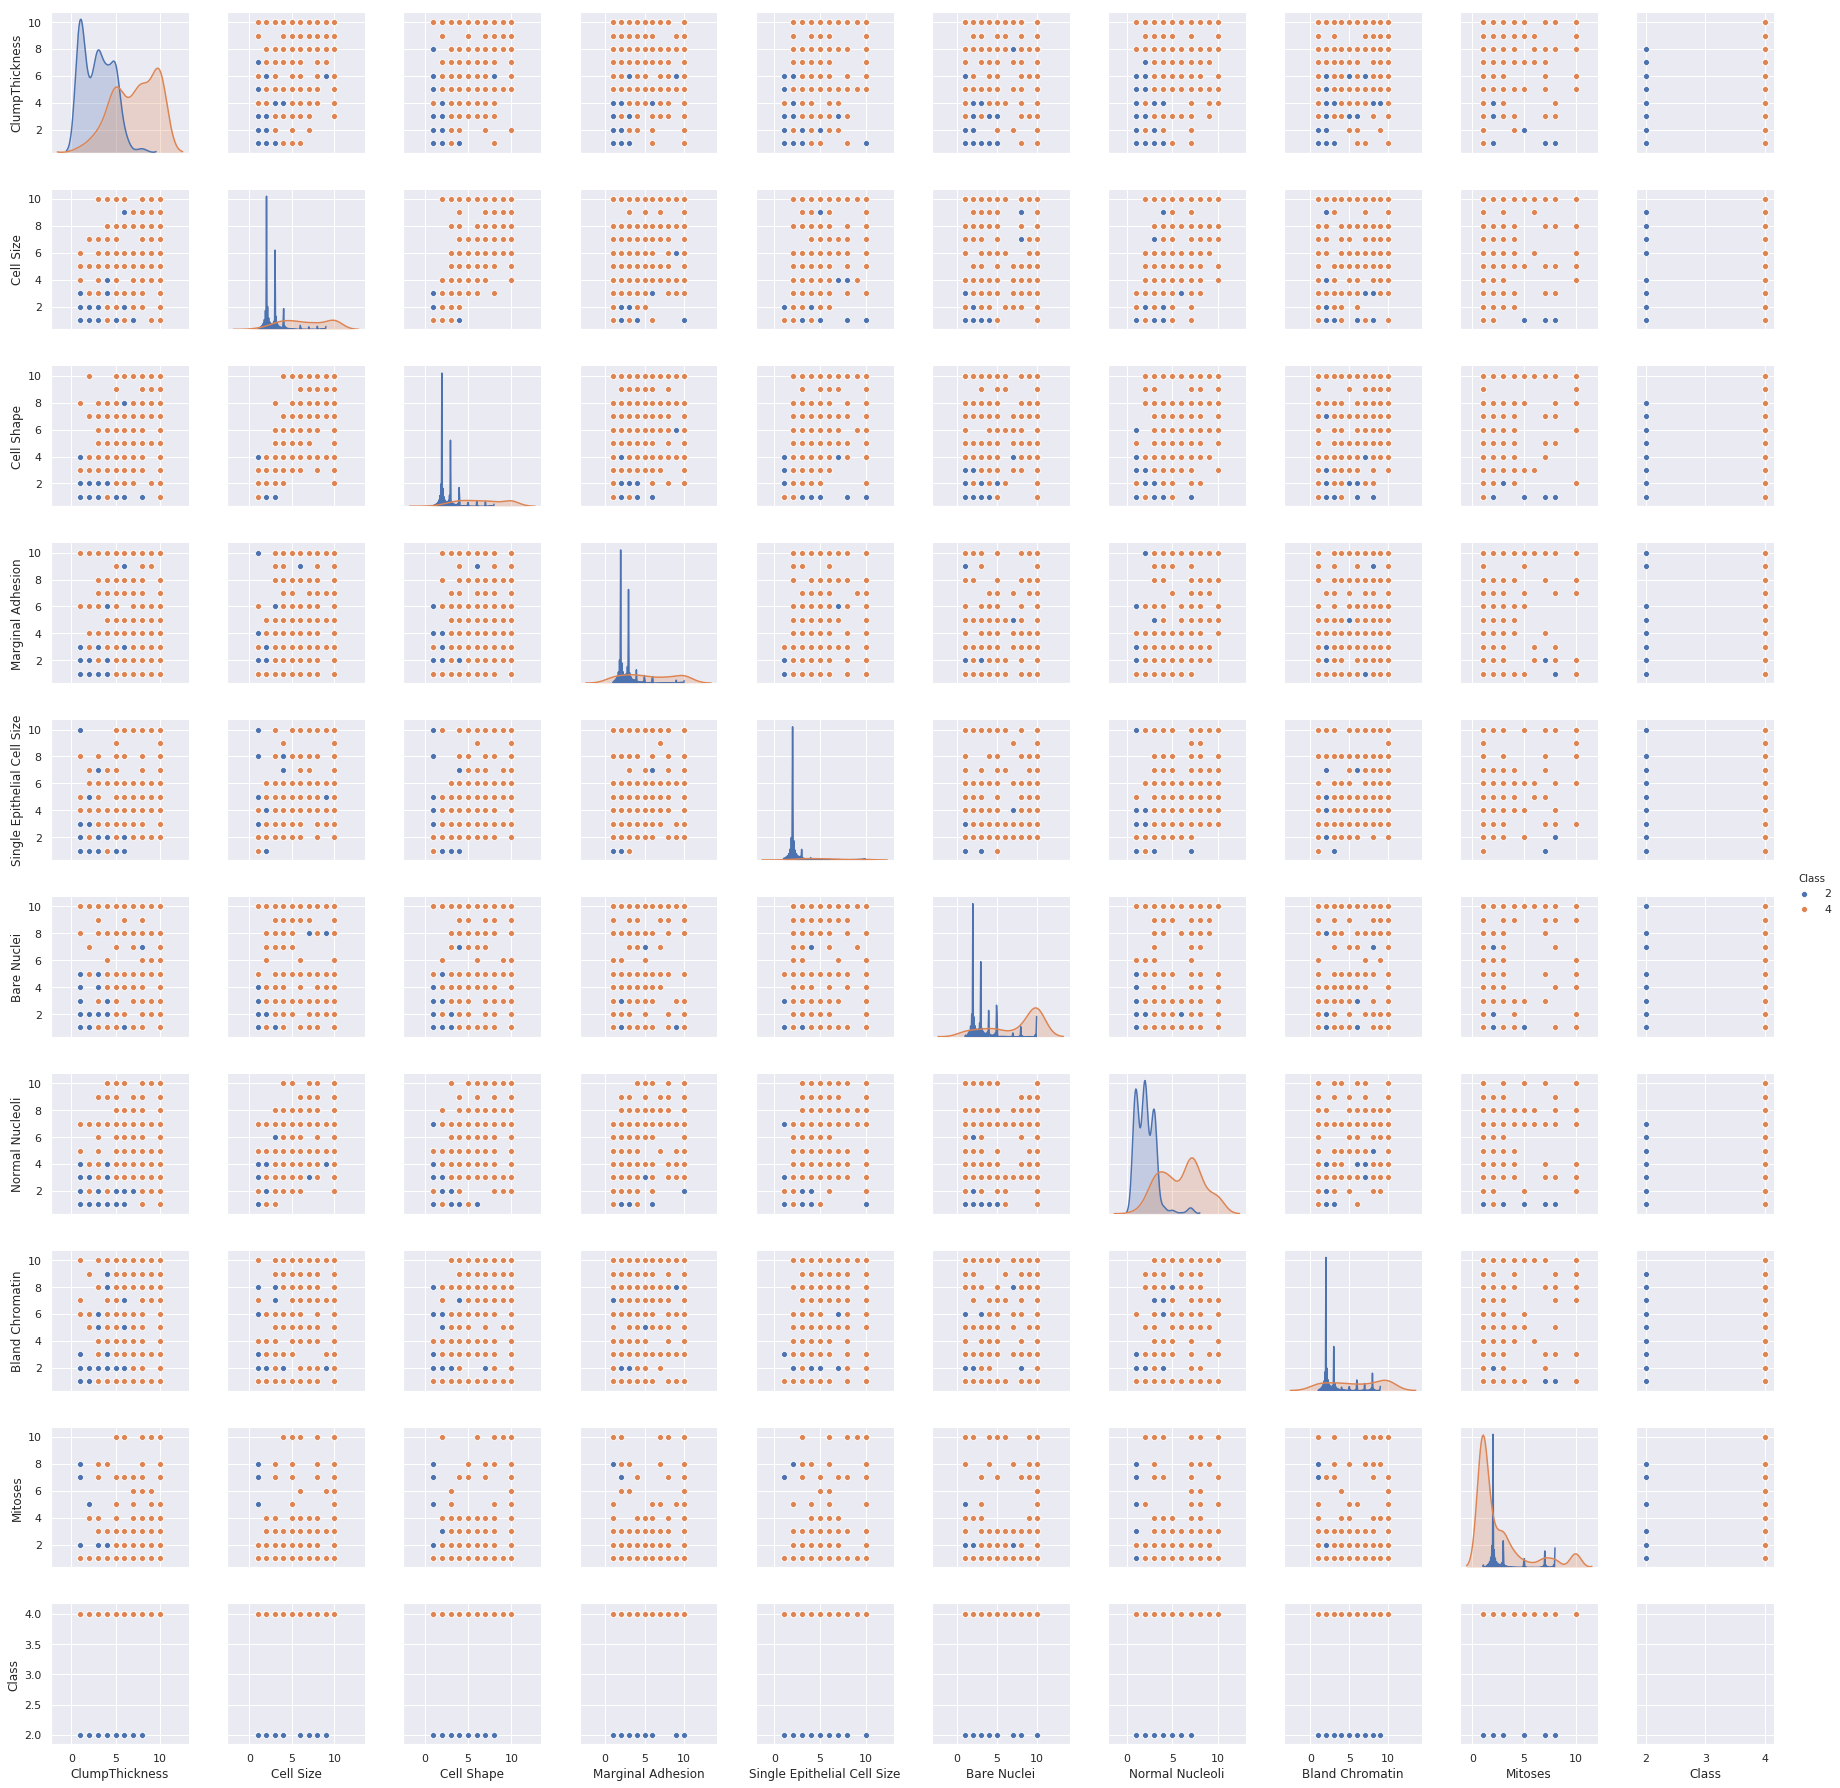

In [72]:
#Let us check for pair plots
#Pair plot that includes all the columns of the data frame

sns.pairplot(data=cancer_data, diag_kind='kde',hue ='Class');

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

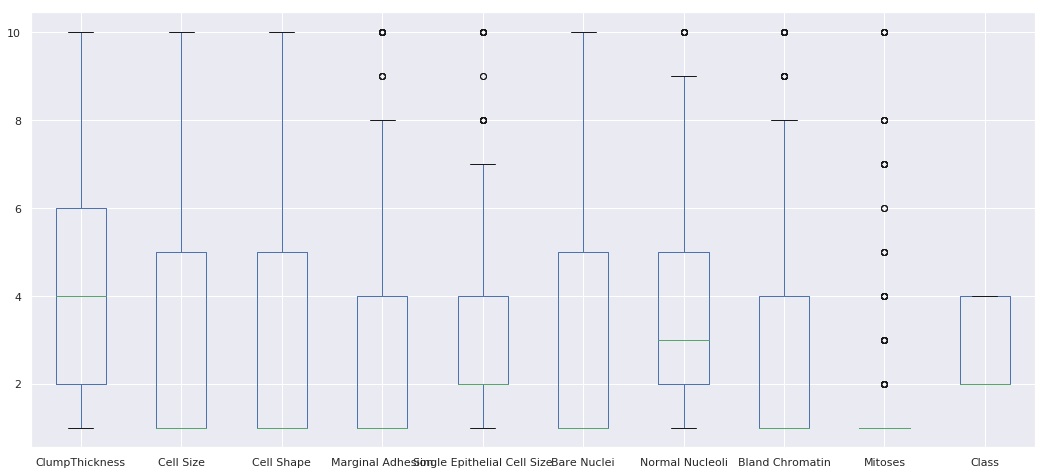

In [94]:
cancer_data.boxplot(figsize=(18,8));

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [82]:
#Now we can drop the Class column as we are proceeding for PCA
cancer_data_pca = cancer_data.drop(['Class'], axis=1)
cancer_data_pca.head(2)


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1


In [0]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing ploting libraries
from scipy.stats import zscore
from sklearn import datasets

In [0]:
X = cancer_data_pca
X_std = StandardScaler().fit_transform(X)

In [88]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix',cov_matrix)

('Covariance Matrix', array([[1.00145138, 0.64410677, 0.65453792, 0.48842317, 0.51800374,
        0.59150555, 0.56187702, 0.53628373, 0.35070402],
       [0.64410677, 1.00145138, 0.9066632 , 0.71396807, 0.74806589,
        0.68556472, 0.76073447, 0.7281282 , 0.46058509],
       [0.65453792, 0.9066632 , 1.00145138, 0.6917849 , 0.71527957,
        0.70518656, 0.73964761, 0.72557104, 0.44107467],
       [0.48842317, 0.71396807, 0.6917849 , 1.00145138, 0.60916409,
        0.67348849, 0.67083263, 0.60310209, 0.41761286],
       [0.51800374, 0.74806589, 0.71527957, 0.60916409, 1.00145138,
        0.58132945, 0.62142658, 0.63480034, 0.48321685],
       [0.59150555, 0.68556472, 0.70518656, 0.67348849, 0.58132945,
        1.00145138, 0.67373075, 0.57900023, 0.34332099],
       [0.56187702, 0.76073447, 0.73964761, 0.67083263, 0.62142658,
        0.67373075, 1.00145138, 0.67006996, 0.34426827],
       [0.53628373, 0.7281282 , 0.72557104, 0.60310209, 0.63480034,
        0.57900023, 0.67006996, 1.0

# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [97]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
#e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.30202869  0.14902209 -0.86872874 -0.00254656 -0.02905197  0.26616691
  -0.19399832 -0.1501391  -0.00300703]
 [-0.38089144  0.04833557  0.03657788 -0.73669737  0.18962075 -0.43946502
  -0.23349186  0.09850317  0.12335951]
 [-0.37721125  0.08333455 -0.02039666  0.66430356  0.16770378 -0.58940349
  -0.15127833  0.06480163  0.08028927]
 [-0.33430954  0.05023423  0.39037637  0.04590901 -0.48684422  0.19404134
  -0.4924605  -0.46232255 -0.0168367 ]
 [-0.33589151 -0.17389022  0.15761632  0.06657451  0.32855055  0.38975065
   0.21090367 -0.06957883  0.72006348]
 [-0.33284901  0.24716817 -0.0294455  -0.07105867 -0.55680581 -0.15915546
   0.69544634  0.01237327  0.05514693]
 [-0.34648894  0.22989544  0.18320773  0.06252437  0.00966191  0.39882942
  -0.12659342  0.73810848 -0.26387659]
 [-0.3364694  -0.02071698  0.1357351  -0.02018486  0.47674458  0.1133626
   0.31256571 -0.41188028 -0.60004044]
 [-0.22972022 -0.90629849 -0.11603305  0.0080874  -0.22956737 -0.04272175
   0.0243

# Q8 Find variance and cumulative variance by each eigen vector

('Cumulative Variance Explained', array([ 65.55540722,  74.1768597 ,  80.1774794 ,  85.35224664,
        89.46666895,  92.81611041,  96.07271412,  98.9962097 ,
       100.        ]))


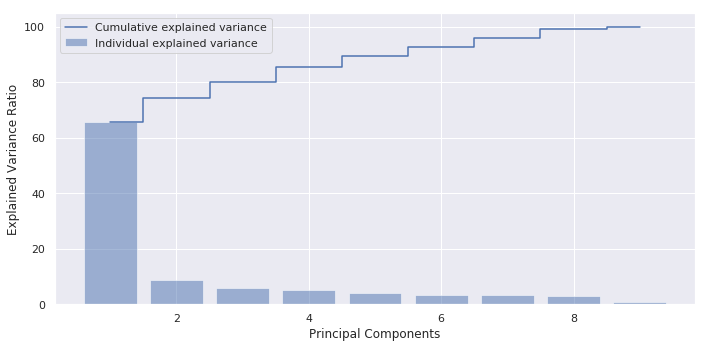

In [98]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [99]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
data_reduced = pca.fit_transform(X_std)
data_reduced.transpose()

array([[-1.46219383,  1.46493511, -1.58466481, ...,  3.82442245,
         2.26583503,  2.66276564],
       [-0.11255721, -0.52824321, -0.07507619, ..., -0.16947098,
        -1.11554682, -1.19224433],
       [-0.57852431,  0.31106239,  0.03046945, ...,  0.78842729,
         0.98218784,  1.07958354],
       [ 0.03202361, -0.77437644, -0.10138831, ...,  2.48877243,
         0.74521696,  0.37298487]])

/usr/local/lib/python2.7/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


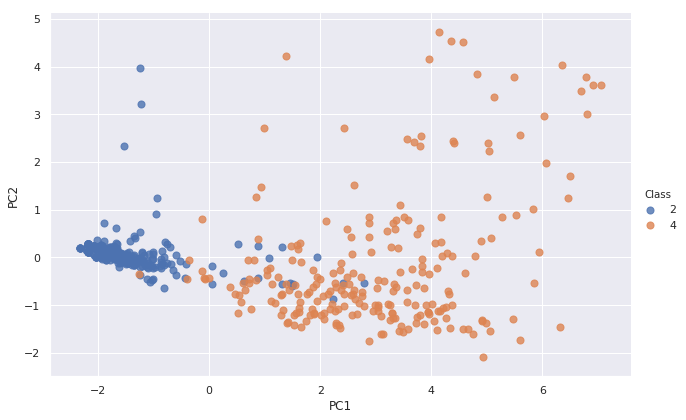

In [103]:
## Plot of PC
cancer_data["PC1"] = data_reduced[:,0]
cancer_data["PC2"] = data_reduced[:,1]
cancer_data["PC3"] = data_reduced[:,2]
cancer_data["PC4"] = data_reduced[:,3]
vis = sns.lmplot(data = cancer_data[["PC1","PC2","PC3","PC4","Class"]], x = "PC1", y = "PC2",fit_reg=False, hue = "Class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )
vis.savefig("pca.png")

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

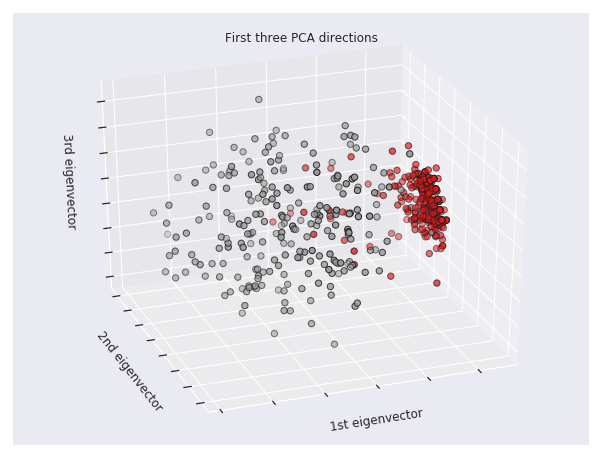

In [108]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
y = cancer_data.Class
X_reduced = PCA(n_components=3).fit_transform(cancer_data_pca)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [109]:
pca.components_

array([[ 0.30202869,  0.38089144,  0.37721125,  0.33430954,  0.33589151,
         0.33284901,  0.34648894,  0.3364694 ,  0.22972022],
       [-0.14902209, -0.04833557, -0.08333455, -0.05023423,  0.17389022,
        -0.24716817, -0.22989544,  0.02071698,  0.90629849],
       [-0.86872874,  0.03657788, -0.02039666,  0.39037637,  0.15761632,
        -0.0294455 ,  0.18320773,  0.1357351 , -0.11603305],
       [-0.02905197,  0.18962075,  0.16770378, -0.48684422,  0.32855055,
        -0.55680581,  0.00966191,  0.47674458, -0.22956737]])

# Q10 Find correlation between components and features

In [110]:
cancer_data.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class,PC1,PC2,PC3,PC4
0,5,1,1,1,2,1,3,1,1,2,-1.462194,-0.112557,-0.578524,0.032024
1,5,4,4,5,7,10,3,2,1,2,1.464935,-0.528243,0.311062,-0.774376
2,3,1,1,1,2,2,3,1,1,2,-1.584665,-0.075076,0.030469,-0.101388
3,6,8,8,1,3,4,3,7,1,2,1.502071,-0.559479,-0.538235,1.475429
4,4,1,1,3,2,1,3,1,1,2,-1.336156,-0.094684,0.002493,-0.297430


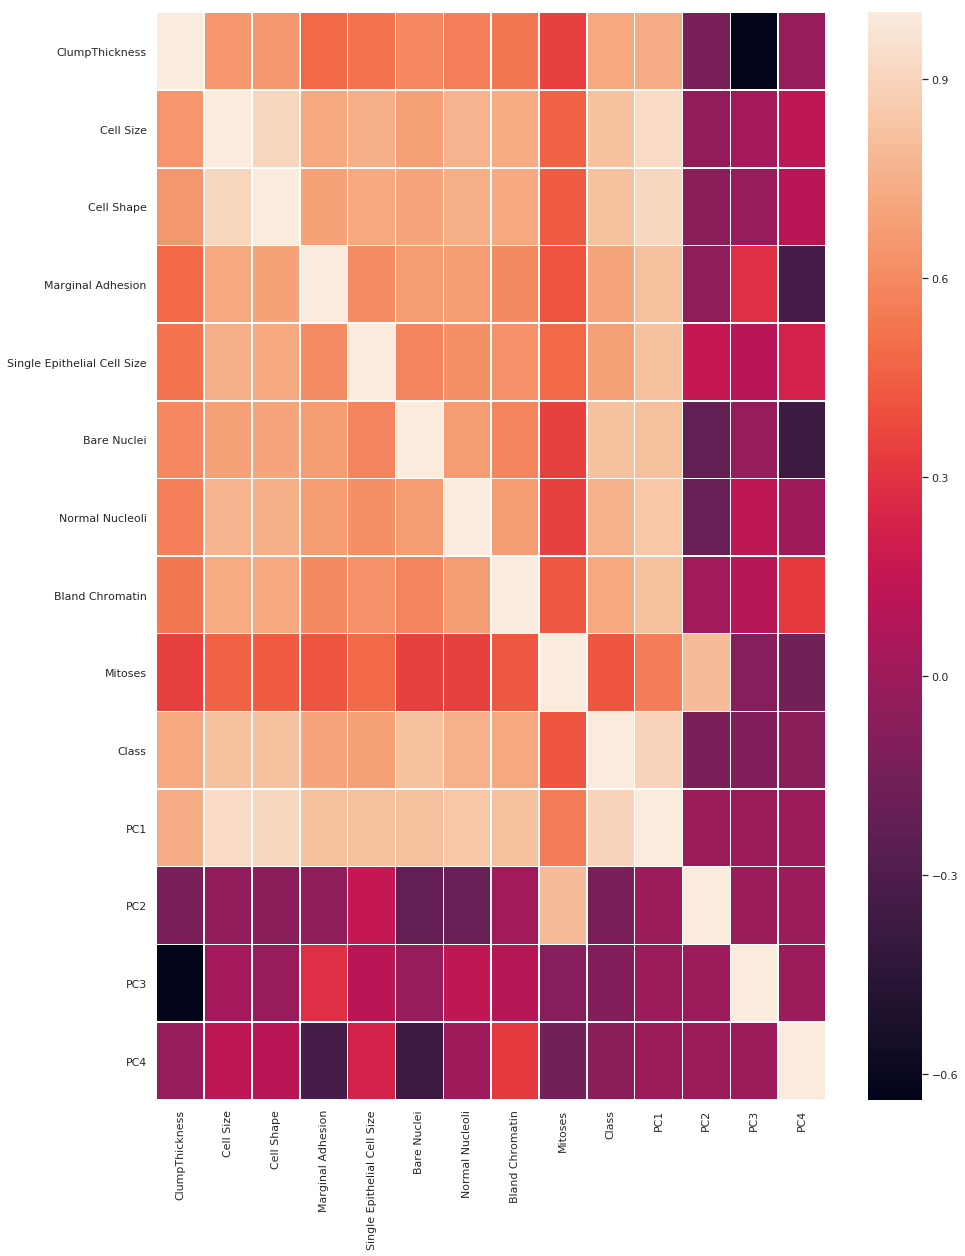

In [117]:
ax = sns.heatmap(cancer_data.corr(),linewidths=.5)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [118]:
jokes_data = pd.read_csv("/content/drive/My Drive/Great_Lakes_Assignments/Lab Internal | Residency 5/jokes.csv")
jokes_data.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,...,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [119]:
ratings = jokes_data.iloc[0:200,1:]
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,Joke40,...,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [121]:
ratings.shape

(200, 100)

# Q13 Change the column indices from 0 to 99

In [123]:
ratings.columns=range(100)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [0]:
ratings.replace(99,0,inplace=True)

In [128]:
ratings.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-9.42,0.00,0.00,0.00,-7.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,0.00,8.25,0.00,0.00,7.48,7.28,7.28,8.93,0.00,6.17,7.28,0.00,0.00,8.98,7.33,0.00,6.17,9.08,7.33,...,6.46,7.28,0.00,0.00,7.04,7.28,0.00,7.28,8.25,0.00,0.00,0.00,0.00,0.00,0.00,8.93,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.03,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,0.00,0.00,0.00,0.00,2.91,3.93,6.75,6.60,0.00,6.65,-6.12,0.00,7.57,6.21,6.65,0.00,-8.30,7.18,2.82,...,0.00,-3.69,0.00,0.00,7.82,0.24,0.00,7.28,-2.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.00,0.00,-2.33,0.00,0.00,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,0.00,0.00,0.00,0.00,0.00,0.00,4.13,0.00,0.00,0.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,-6.80,-5.73,-5.00,-8.59,0.49,-8.93,-3.69,-2.18,-2.28,-6.12,-3.01,-0.58,-2.38,-7.77,-2.23,-2.28,-5.24,-5.53,-0.68,-6.94,-3.93,-0.34,-6.60,-5.49,-1.55,-0.49,-6.21,-8.06,-5.39,-7.04,...,-6.65,-2.86,-4.61,-9.42,-7.91,-9.81,-9.42,-8.98,-1.94,-6.99,-9.66,-5.19,-5.00,-4.42,-7.28,-6.50,-4.32,-6.94,-9.85,0.73,-6.21,-2.86,-7.62,-6.12,-0.29,-1.41,-3.93,-1.94,-5.68,-4.71,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,4.27,7.62,-6.26,2.96,6.07,-3.50,-2.09,6.17,5.15,4.42,5.63,2.43,0.00,0.00,4.13,7.09,7.33,7.18,0.92,0.00,5.15,5.87,0.00,0.00,7.96,3.79,0.00,1.55,0.00,3.11,...,-1.50,5.78,0.00,0.00,8.93,8.50,0.00,2.43,7.48,0.00,0.00,5.97,6.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,8.20,-7.86,-6.94,-7.96,0.29,-9.90,-7.09,-7.18,1.02,-0.29,-4.71,-7.43,1.12,-8.25,3.79,0.10,3.45,-3.45,7.57,-4.17,-0.44,9.27,5.83,-3.40,-5.44,1.60,-7.14,3.01,-6.07,5.68,...,-3.20,-6.12,-2.91,-9.22,-2.62,-7.33,-3.25,-4.22,-9.81,-2.09,-9.90,-3.79,0.49,-7.86,-9.85,1.80,-4.17,-2.38,-9.13,-8.88,3.54,-4.56,-5.44,-5.97,-9.90,-0.34,-4.13,-0.10,-0.24,-7.96,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,-2.91,-0.29,-4.85,-0.49,-8.74,-6.99,-8.74,-2.91,-3.35,-0.29,3.98,-1.60,-0.29,1.21,3.79,2.91,4.85,2.28,0.97,-0.29,6.36,0.53,-0.29,4.66,3.35,0.97,-3.11,-1.84,4.42,-4.42,...,1.21,5.53,1.41,-6.50,4.85,4.85,2.62,1.41,6.36,1.41,-4.76,4.17,

# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [134]:
ratings_t = ratings.T
ratings_t.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-7.82,4.08,0.00,0.00,8.50,-6.17,0.00,6.84,-3.79,3.01,-2.91,1.31,0.00,9.22,8.79,-3.50,0.00,3.16,4.22,0.00,2.57,7.28,2.72,2.09,-3.93,0.00,0.00,0.49,0.0,0.00,1.94,0.00,1.02,0.00,5.92,-9.66,7.18,-3.69,2.96,0.00,...,-2.62,0.00,0.0,4.22,0.00,-0.53,7.43,0.00,0.00,-7.14,0.00,-4.56,0.00,0.00,0.00,-9.42,-3.54,5.39,0.00,4.42,0.0,5.44,0.00,8.30,-8.16,-2.86,-0.10,-6.31,0.00,0.00,3.54,4.47,8.06,1.84,-9.71,5.73,1.80,2.62,0.00,5.58
1,8.79,-0.29,0.00,8.35,4.61,-3.54,0.00,3.16,-3.54,5.15,4.08,1.80,0.00,9.27,-5.78,1.55,-9.27,7.62,3.64,7.62,-0.73,5.39,4.17,-7.57,-1.17,5.49,5.83,0.15,0.0,4.08,0.87,5.68,3.20,0.00,-1.65,-8.35,9.17,-1.12,2.96,0.00,...,-2.28,0.00,0.0,1.80,6.36,-9.37,-9.95,0.00,2.23,7.04,0.00,-3.74,0.00,0.00,0.00,8.83,-3.20,0.24,0.00,-5.05,0.0,0.49,-8.98,8.20,-7.86,-6.31,-5.68,-1.94,0.00,-3.16,-6.70,-0.19,3.45,-2.23,-8.25,0.00,5.39,-3.79,0.00,-7.28
2,-9.66,6.36,0.00,0.00,-4.17,0.44,0.00,9.17,-9.42,5.15,0.00,2.57,0.00,9.22,6.02,2.33,0.00,3.79,0.00,0.00,0.00,0.00,6.50,4.17,2.28,3.45,0.00,0.15,0.0,0.00,1.41,5.68,3.20,0.00,5.92,0.00,9.13,0.00,2.96,0.00,...,-3.69,0.00,0.0,7.09,9.27,-0.63,8.83,0.00,0.00,0.00,0.00,-2.67,0.00,0.00,0.00,8.45,1.12,0.00,0.00,0.00,0.0,0.00,-9.66,4.95,-1.02,-4.90,1.50,0.00,0.00,-3.45,-4.76,1.55,3.69,5.49,-8.30,-0.58,8.06,-1.17,0.00,-4.56
3,-8.16,4.37,0.00,0.00,-5.39,-8.50,0.00,-6.21,-6.89,3.01,0.00,-2.38,0.00,8.30,3.69,-4.13,0.00,8.25,0.00,0.00,0.00,0.00,-3.54,-8.40,-0.44,0.00,0.00,-9.56,0.0,0.00,2.96,0.00,2.86,0.00,5.87,0.00,3.74,0.00,2.96,0.00,...,1.80,0.00,0.0,-1.12,7.04,-8.20,-0.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.64,3.83,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.89,-7.72,0.00,0.00,0.00,0.00,-1.50,-1.36,5.49,-2.62,1.75,-0.10,-0.44,0.00,2.67
4,-7.52,-2.38,9.03,1.80,1.36,-7.09,8.59,-8.16,-8.74,6.41,-5.73,0.73,5.87,7.43,7.77,4.22,-7.38,4.22,2.52,-8.64,2.57,-4.22,-3.30,-6.31,-2.28,0.15,5.34,-9.76,-1.7,5.87,4.85,3.45,2.38,-1.99,3.06,0.29,8.69,0.87,3.74,-3.01,...,-2.09,-9.42,1.7,3.50,4.85,1.70,-3.35,4.51,-5.34,6.75,4.27,-3.40,4.37,0.34,-4.32,5.73,3.30,-6.55,4.13,1.55,5.1,-1.21,-6.12,0.78,0.34,3.01,-7.91,3.69,8.16,2.96,-8.16,-4.42,3.93,4.37,-8.93,2.86,4.81,-1.02,7.91,7.38


In [135]:
from sklearn.preprocessing import StandardScaler
ratings_diff = StandardScaler().fit_transform(ratings_t)
ratings_diff

array([[-0.92720712,  0.27457908, -0.7878666 , ...,  1.24899421,
        -0.30733439,  0.91467957],
       [ 1.98941099, -0.62510643, -0.7878666 , ..., -1.22567595,
        -0.30733439, -1.89065773],
       [-1.25030027,  0.74398021, -0.7878666 , ..., -0.2141883 ,
        -0.30733439, -1.29730489],
       ...,
       [ 0.44593879, -0.49540349, -0.7878666 , ..., -0.04432015,
        -0.30733439, -0.30256632],
       [ 0.44593879, -1.45479352, -0.7878666 , ...,  0.51933328,
        -0.30733439, -0.30256632],
       [ 0.44593879, -0.34511277, -0.7878666 , ...,  0.40737472,
        -0.30733439, -0.30256632]])

In [136]:
ratings_diff.shape

(100, 200)

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [0]:
ratings_mean = ratings_diff.mean(axis=1)

In [138]:
ratings_mean

array([-0.00750712, -0.04599906, -0.10707627, -0.32946024, -0.17790901,
        0.14416335, -0.14245948, -0.2529505 , -0.14446555,  0.07500963,
        0.12692589,  0.13623836, -0.49106203,  0.30513406, -0.57306865,
       -0.92386158, -0.49712044, -0.37160086, -0.11704844, -0.39704547,
        0.44163283,  0.07538555, -0.1050732 , -0.42382901, -0.02252966,
        0.08707342,  0.60972362,  0.10289024,  0.6642304 , -0.35885747,
        0.50249102,  0.52189075, -0.19274273,  0.07743073,  0.69230389,
        0.75197178, -0.29936982,  0.0751037 ,  0.05124105, -0.01323282,
       -0.21815835,  0.37486252, -0.29597156, -0.45711105, -0.03619337,
        0.31489334,  0.17736473,  0.18280502,  0.5320071 ,  0.87821678,
       -0.22012481, -0.02494807,  0.73670016,  0.31614636,  0.05310318,
        0.41407327, -0.39348134, -0.7217115 , -0.19241029, -0.16650425,
        0.39273193,  0.55754984, -0.08241105, -0.37911416,  0.49532245,
        0.39250225, -0.19756691,  0.40890015,  0.47513885, -0.06

In [0]:
ratings_t["ratings_mean"] = ratings_mean

In [141]:
ratings_t['ratings_mean'].sort_values(ascending = False).iloc[0:10]

49    0.878217
35    0.751972
52    0.736700
34    0.692304
28    0.664230
26    0.609724
61    0.557550
48    0.532007
31    0.521891
30    0.502491
Name: ratings_mean, dtype: float64